In [10]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from os import listdir
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\python\python38\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['grid', 'step', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [11]:
class grid_class(object):
    def __init__(self, size_x=100, size_y=100, coeff=0.5):
        self.data=np.random.choice([0, 1], (size_x, size_y), replace=True, p=[coeff, 1.0-coeff])
        self.new_data = self.data.copy()
        self.size_x=size_x
        self.size_y=size_y
        self.coeff=coeff
        
    def plot(self):
        figure(figsize=(5,5))
        imshow(self.data, aspect='auto', interpolation='none')
        gca().set_xticks([])
        gca().set_yticks([])
    
    def count_neighbours(self, i=0, j=0):
        count=0
        
        for incx in [-1,0,1]:
            for incy in [-1,0,1]:
                if ((incx!=0) or (incy!=0)):
                    ix=i+incx
                    iy=j+incy
                    
                    if ix==-1:
                        ix+=self.size_x;
                    elif ix==self.size_x:
                        ix=0
                        
                    if iy==-1:
                        iy+=self.size_y;
                    elif iy==self.size_y:
                        iy=0
                        
                    if self.data[ix,iy]==1:
                        count+=1
                    
        return count
    
    def update(self,i=0,j=0):
        count=self.count_neighbours(i,j)
        change=0
        
        # if dead stay dead unless exactly three alive
        # if alive stay alive only when two or three alive
        # flip state otherwise
        if (self.data[i,j]==0) and (count==3) or (self.data[i,j]==1) and ((count<2) or (count>3)):
            self.new_data[i,j]=1-self.data[i,j]
            change=1

        return change
                        
    def one_time_step(self):
        # go through the map, update each cell
        change_count=0
        
        for i in range(self.size_x):
            for j in range(self.size_y):
                change_count+=self.update(i,j)
        self.data = self.new_data.copy()
        return change_count

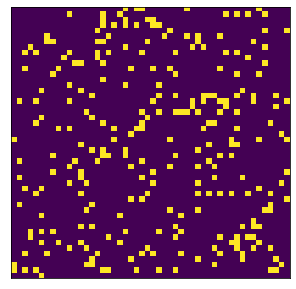

In [12]:
grid=grid_class(50,50,0.9)
grid.plot()

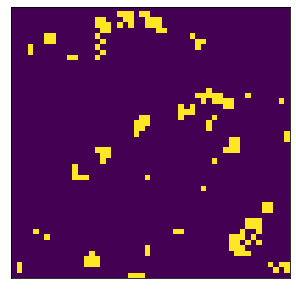

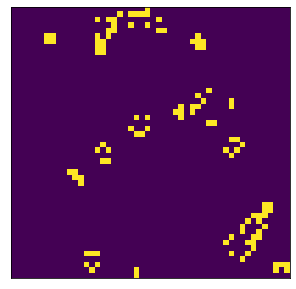

In [13]:
grid.one_time_step()
grid.plot()
grid.one_time_step()
grid.plot()

# Multi process

In [14]:
!mpiexec -n 4 python Task9.py

(99, 12, 70)
(99, 13, 70)
(99, 13, 70)
(99, 12, 70)


In [15]:
res = []
for i in range(4):
    with open('life_'+str(i)+'.npy', 'rb') as f:
        #print(np.load(f).shape)
        res.append(np.load(f))
res = np.concatenate(res,axis = 1)

In [16]:
res.shape

(99, 50, 70)

In [18]:
%mkdir game_of_life_pro_4

In [19]:
for i,step in enumerate(res):
    fig = plt.figure(figsize = (14,11))
    plt.imshow(step, cmap='Greys' )
    if i < 10:
        plt.savefig('game_of_life_pro_4/'+'0'+str(i)+'.png')
    else:
        plt.savefig('game_of_life_pro_4/'+str(i)+'.png')
    plt.close(fig)

In [18]:
from os import listdir
images = []
for filename in sorted(listdir('game_of_life_pro_4')):
    images.append(imageio.imread('game_of_life_pro_4/'+filename))
imageio.mimsave('game_of_life_pro_4/game_of_life.gif', images)

# 3 different initial conditions

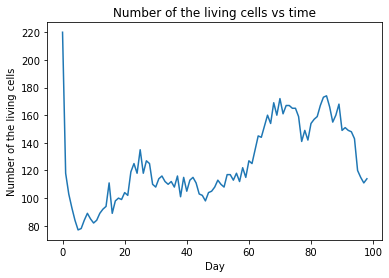

In [139]:
days = 99
grid=grid_class(50,50,0.9)
living = []
steps = []
for day in range(days):
    living.append(np.sum(grid.data))
    steps.append(grid.data.copy())
    grid.one_time_step()
steps = np.array(steps)
for i,step in enumerate(steps):
    fig = plt.figure(figsize = (14,11))
    plt.imshow(step, cmap='Greys' )
    if i < 10:
        plt.savefig('game_of_life_1/'+'0'+str(i)+'.png')
    else:
        plt.savefig('game_of_life_1/'+str(i)+'.png')
    plt.close(fig)
images = []
for filename in sorted(listdir('game_of_life_1')):
    images.append(imageio.imread('game_of_life_1/'+filename))
imageio.mimsave('game_of_life_1/game_of_life.gif', images)
plt.plot(living)
plt.title("Number of the living cells vs time")
plt.xlabel('Day')
plt.ylabel('Number of the living cells')
plt.show()

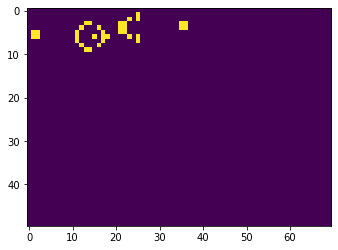

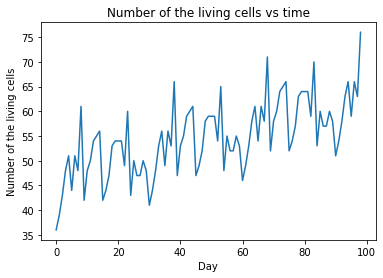

In [140]:
glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

X = np.zeros((50, 70))
X[1:10,1:37] = glider_gun

days = 99
grid1=grid_class(50,70,0.9)
grid1.data = X.reshape((50,70)).copy()
grid1.new_data = X.reshape((50,70)).copy()
plt.imshow(grid1.data)
plt.show()
living = []
steps = []
for day in range(days):
    living.append(np.sum(grid1.data))
    steps.append(grid1.data.copy())
    grid1.one_time_step()
steps = np.array(steps)
for i,step in enumerate(steps):
    fig = plt.figure(figsize = (14,11))
    plt.imshow(step, cmap='Greys' )
    if i < 10:
        plt.savefig('game_of_life_2/'+'0'+str(i)+'.png')
    else:
        plt.savefig('game_of_life_2/'+str(i)+'.png')
    plt.close(fig)
images = []
for filename in sorted(listdir('game_of_life_2')):
    images.append(imageio.imread('game_of_life_2/'+filename))
imageio.mimsave('game_of_life_2/game_of_life.gif', images)
plt.plot(living)
plt.title("Number of the living cells vs time")
plt.xlabel('Day')
plt.ylabel('Number of the living cells')
plt.show()

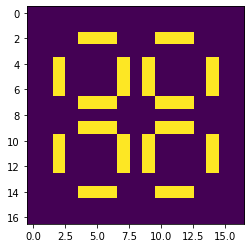

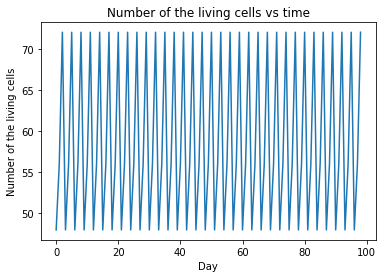

In [141]:
X = np.zeros((17, 17))
X[2, 4:7] = 1
X[4:7, 7] = 1
X += X.T
X += X[:, ::-1]
X += X[::-1, :]

days = 99
grid1=grid_class(17,17,0.9)
grid1.data = X.reshape((17,17)).copy()
grid1.new_data = X.reshape((17,17)).copy()
plt.imshow(grid1.data)
plt.show()
living = []
steps = []
for day in range(days):
    living.append(np.sum(grid1.data))
    steps.append(grid1.data.copy())
    grid1.one_time_step()
steps = np.array(steps)
for i,step in enumerate(steps):
    fig = plt.figure(figsize = (14,11))
    plt.imshow(step, cmap='Greys' )
    if i < 10:
        plt.savefig('game_of_life_3/'+'0'+str(i)+'.png')
    else:
        plt.savefig('game_of_life_3/'+str(i)+'.png')
    plt.close(fig)
images = []
for filename in sorted(listdir('game_of_life_3')):
    images.append(imageio.imread('game_of_life_3/'+filename))
imageio.mimsave('game_of_life_3/game_of_life.gif', images)
plt.plot(living)
plt.title("Number of the living cells vs time")
plt.xlabel('Day')
plt.ylabel('Number of the living cells')
plt.show()